In [ ]:
!python -m spacy download el_core_news_md


     |████████████████████████████████| 132.6MB 1.2MB/s 
  Created wheel for el-core-news-md: filename=el_core_news_md-2.2.5-cp36-none-any.whl size=137053458 sha256=3514c2bf64d34a8b23e0acea8f436814a1336468948a576069884eab434f1e2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pua5r1dx/wheels/e3/70/65/a02c5c86342d8a6d6d25664309af6137a0c514206e96438251
Successfully built el-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
full_tweets_df =pd.read_csv("/gdrive/My Drive/Colab Notebooks/Kikilias.tsv", sep='\t')


In [ ]:
full_tweets_df.head(10)


,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink
0,0,Sat Jun 20 12:51:58 +0000 2020,1274324111444099074,1274324111444099074,"Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ...",False,"[0, 134]","{'hashtags': [{'text': 'Καστελόριζο', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",1.274322e+18,1.274322e+18,54283324.0,54283324.0,Vkikilias,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,5,40,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Jun 20 12:44:15 +0000 2020,1274322167530958851,1274322167530958851,Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις....,False,"[0, 274]","{'hashtags': [{'text': 'Καστελόριζο', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,22,113,False,False,el,False,NaN,NaN,NaN,NaN,NaN
2,2,Fri Jun 19 20:19:25 +0000 2020,1274074328234110976,1274074328234110976,RT @USAmbPyatt: I’m very proud of the role tha...,False,"[0, 140]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,16,0,False,False,en,NaN,{'created_at': 'Fri Jun 19 05:25:37 +0000 2020...,NaN,NaN,NaN,NaN
3,3,Fri Jun 19 18:19:30 +0000 2020,1274044148987953154,1274044148987953154,RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι έν...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,6,0,False,False,el,False,{'created_at': 'Fri Jun 19 17:00:05 +0000 2020...,NaN,NaN,NaN,NaN
4,4,Fri Jun 19 18:15:24 +0000 2020,1274043119718354946,1274043119718354946,Θα τα καταφέρουμε. \nΚαι πάλι. #Ρόδος https://...,False,"[0, 36]","{'hashtags': [{'text': 'Ρόδος', 'indices': [30...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,24,150,False,False,el,False,NaN,"{'media': [{'id': 1274043062570942466, 'id_str...",NaN,NaN,NaN
5,5,Fri Jun 19 14:40:51 +0000 2020,1273989122839973889,1273989122839973889,"Επισκέφθηκα σήμερα το Νοσοκομείο Ρόδου, που θα...",False,"[0, 279]","{'hashtags': [{'text': 'Δωδεκάνησα', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,19,82,False,False,el,False,NaN,"{'media': [{'id': 1273989115047022594, 'id_str...",NaN,NaN,NaN
6,6,Fri Jun 19 14:37:48 +0000 2020,1273988355311665152,1273988355311665152,RT @amna_newseng: Health Minister @Vkikilias v...,False,"[0, 140]","{'hashtags': [{'text': 'Rhodes', 'indices': [5...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,10,0,False,False,en,False,{'created_at': 'Fri Jun 19 14:36:33 +0000 2020...,NaN,NaN,NaN,NaN
7,7,Fri Jun 19 14:24:57 +0000 2020,1273985121499131906,1273985121499131906,Μοριακός αναλυτής με δυνατότητα 420 τεστ την η...,False,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,False,3,14,False,False,el,False,NaN,NaN,NaN,NaN,NaN
8,8,Fri Jun 19 14:24:13 +0000 2020,1273984936907878401,1273984936907878401,RT @ysterografa: Κικίλιας: Η Ελλάδα απέδειξε ό...,False,"[0, 140]","{'hashtags': [{'text': 'Ysterografa', 'indices..

In [ ]:
short_tweets = full_tweets_df[['created_at','full_text' ]]
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )


In [ ]:
short_tweets.head()


,date,text
0,Sat Jun 20 12:51:58 +0000 2020,"Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ..."
1,Sat Jun 20 12:44:15 +0000 2020,Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις....
2,Fri Jun 19 20:19:25 +0000 2020,RT @USAmbPyatt: I’m very proud of the role tha...
3,Fri Jun 19 18:19:30 +0000 2020,RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι έν...
4,Fri Jun 19 18:15:24 +0000 2020,Θα τα καταφέρουμε. \nΚαι πάλι. #Ρόδος https://...


In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
short_tweets.dtypes


date    datetime64[ns]
text            object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")


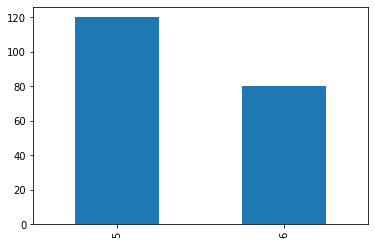

In [ ]:
short_tweets['month'].value_counts().plot(kind='bar')


In [ ]:
short_tweets[short_tweets['year']==2020]['text']


0      Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ...
1      Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις....
2      RT @USAmbPyatt: I’m very proud of the role tha...
3      RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι έν...
4                Θα τα καταφέρουμε. \nΚαι πάλι. #Ρόδος  
                             ...                        
195    Εν μέσω μιας παγκόσμιας διαμάχης υλικών &amp; ...
196    RT @YpYgGR: Οι κινητές ομάδες του Ε.Ο.Δ.Υ. στη...
197    RT @YpYgGR: Οι Κινητές Ομάδες του Εθνικού Οργα...
198    RT @TheLeadCNN: How Greece managed to keep cor...
199    Η σωστή υγιεινή των χεριών πρώτος  κανόνας πρό...
Name: text, Length: 200, dtype: object

In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')
text

0      Προσλαμβανουμε αμεσα ως επικουρικο προσωπικο, ...
1      Σημερα στο #Καστελοριζο για να δωσουμε λυσεις....
2      RT @USAmbPyatt: I’m very proud of the role tha...
3      RT @rodosreport: Β. Κικιλιας: Η Ροδος ειναι εν...
4                Θα τα καταφερουμε. \nΚαι παλι. #Ροδος  
                             ...                        
195    Εν μεσω μιας παγκοσμιας διαμαχης υλικων &amp; ...
196    RT @YpYgGR: Οι κινητες ομαδες του Ε.Ο.Δ.Υ. στη...
197    RT @YpYgGR: Οι Κινητες Ομαδες του Εθνικου Οργα...
198    RT @TheLeadCNN: How Greece managed to keep cor...
199    Η σωστη υγιεινη των χεριων πρωτος  κανονας προ...
Name: text, Length: 200, dtype: object

In [ ]:
text = short_tweets[short_tweets['year']==2020]['text'].str.cat(sep = ' ').replace("\n", ' ')
text


'Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ειδικευμένη γυναικολόγο-μαιευτήρα συνυπηρετώντας με τον ένστολο σύζυγό της. #Καστελόριζο Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις. Ενισχύουμε τις υγειονομικές δομές σε κάθε γωνιά της χώρας.  Η κενή θέση ιατρού υπηρεσίας υπαίθρου καλύπτεται από οπλίτη ιατρό, έπειτα από συνεννόηση με τον Υφυπουργό Εθνικής Άμυνας, Αλκιβιάδη Στεφανή. 🇬🇷   RT @USAmbPyatt: I’m very proud of the role that US science and technology are playing in helping to shape the Greek response to #COVID19. M… RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι ένα νησί-σύμβολο για τον τουρισμό μας   Θα τα καταφέρουμε.  Και πάλι. #Ρόδος   Επισκέφθηκα σήμερα το Νοσοκομείο Ρόδου, που θα έχει από τη Δευτέρα μοριακό αναλυτή 420 τεστ/ημέρα. Ευχαριστώ τον Περιφερειάρχη @ghatzimarkos, που παρέδωσε στο ΕΚΑΒ δύο υπερσύγχρονες κάψουλες αεροδιακομιδών.  Ρόδος, νησί-σύμβολο για τον τουρισμό μας. #Δωδεκάνησα #Μένουμε_Ασφαλείς   RT @amna_newseng: Health Minister @Vkikilias visits #Rhodes islan

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
import spacy



In [ ]:
nlp = spacy.load('el_core_news_sm')


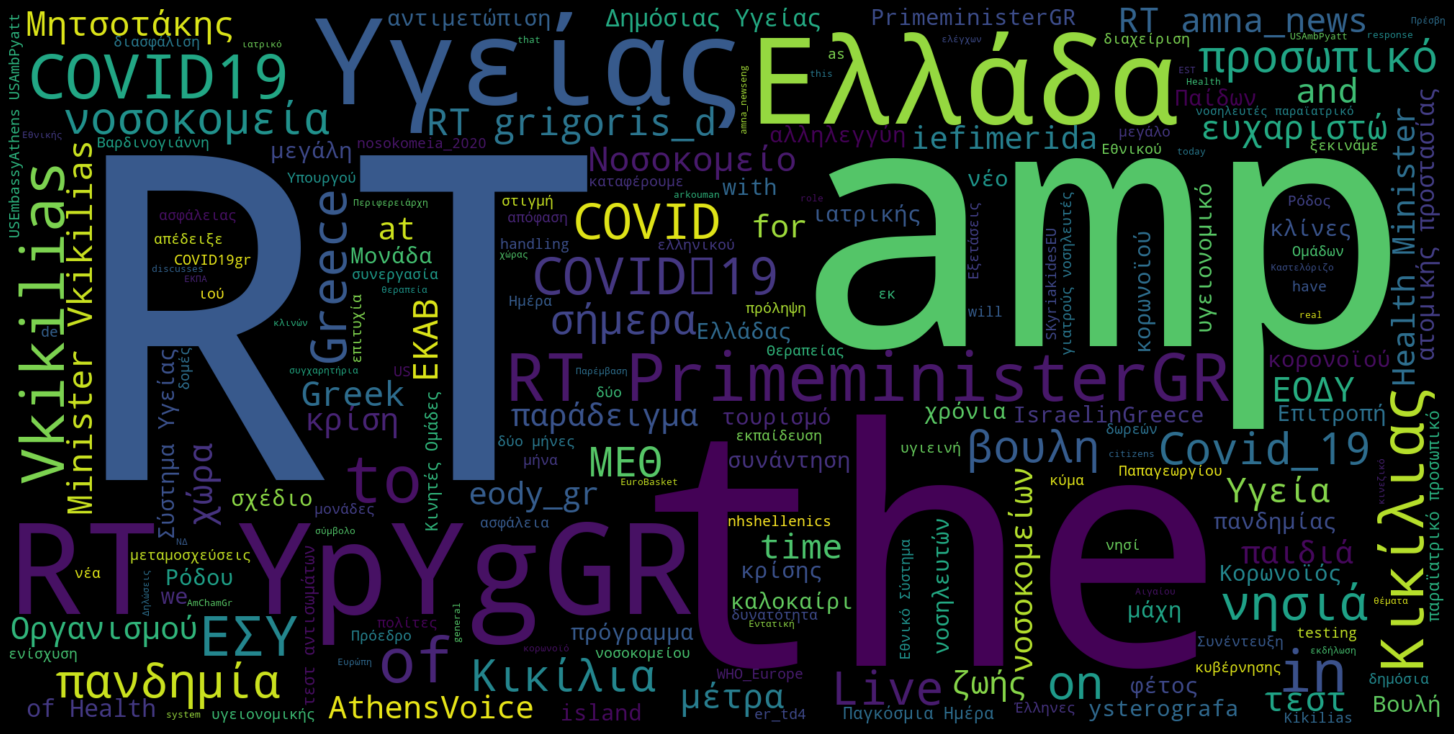

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc = nlp(short_tweets['text'][1])


In [ ]:
for token in doc:
    print(token, token.lemma_)

Σήμερα σήμερα
στο στο
# #
Καστελόριζο καστελόριζο
για για
να να
δώσουμε δώσω
λύσεις λύσει
. .
Ενισχύουμε ενισχύω
τις τις
υγειονομικές υγειονομικός
δομές δομή
σε σε
κάθε κάθε
γωνιά γωνιά
της της
χώρας χώρα
. .

 

Η η
κενή κενός
θέση θέση
ιατρού ιατρός
υπηρεσίας υπηρεσία
υπαίθρου υπαίθρο
καλύπτεται καλύπτομαι
από από
οπλίτη οπλίτη
ιατρό ιατρό
, ,
έπειτα έπειτα
από από
συνεννόηση συνεννόηση
με με
τον τον
Υφυπουργό υφυπουργό
Εθνικής εθνικός
Άμυνας άμυνα
, ,
Αλκιβιάδη Αλκιβιάδη
Στεφανή Στεφανή
. .
🇬 🇬
🇷 🇷
   


In [ ]:
' '.join(token.lemma_ for token in doc)


'σήμερα στο # καστελόριζο για να δώσω λύσει . ενισχύω τις υγειονομικός δομή σε κάθε γωνιά της χώρα . \n η κενός θέση ιατρός υπηρεσία υπαίθρο καλύπτομαι από οπλίτη ιατρό , έπειτα από συνεννόηση με τον υφυπουργό εθνικός άμυνα , Αλκιβιάδη Στεφανή . 🇬 🇷  '

In [ ]:
text


'Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ειδικευμένη γυναικολόγο-μαιευτήρα συνυπηρετώντας με τον ένστολο σύζυγό της. #Καστελόριζο Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις. Ενισχύουμε τις υγειονομικές δομές σε κάθε γωνιά της χώρας.  Η κενή θέση ιατρού υπηρεσίας υπαίθρου καλύπτεται από οπλίτη ιατρό, έπειτα από συνεννόηση με τον Υφυπουργό Εθνικής Άμυνας, Αλκιβιάδη Στεφανή. 🇬🇷   RT @USAmbPyatt: I’m very proud of the role that US science and technology are playing in helping to shape the Greek response to #COVID19. M… RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι ένα νησί-σύμβολο για τον τουρισμό μας   Θα τα καταφέρουμε.  Και πάλι. #Ρόδος   Επισκέφθηκα σήμερα το Νοσοκομείο Ρόδου, που θα έχει από τη Δευτέρα μοριακό αναλυτή 420 τεστ/ημέρα. Ευχαριστώ τον Περιφερειάρχη @ghatzimarkos, που παρέδωσε στο ΕΚΑΒ δύο υπερσύγχρονες κάψουλες αεροδιακομιδών.  Ρόδος, νησί-σύμβολο για τον τουρισμό μας. #Δωδεκάνησα #Μένουμε_Ασφαλείς   RT @amna_newseng: Health Minister @Vkikilias visits #Rhodes islan

In [ ]:
full_doc = nlp(text)


In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[100:200]


' ένστολος σύζυγό της . # καστελόριζο σήμερα στο # καστελόριζο για να δώσω λύσει . ενισχύω τις υγειον'

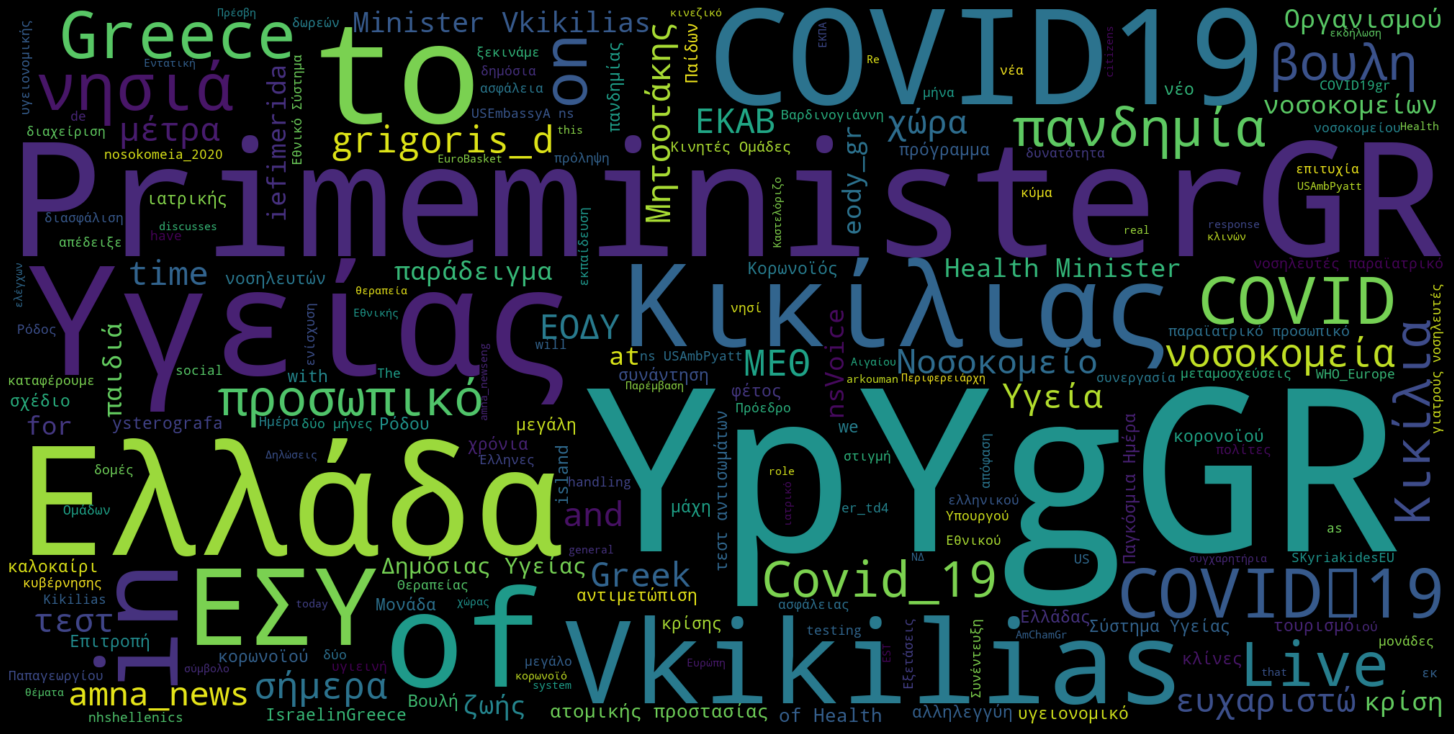

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
text = text.replace('rt', " ")
text = text.replace('the', " ")
text = text.replace('to', " ")
text = text.replace('amp', " ")
text = text.replace('YpYgGR', " ")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])
count_vector.shape


(200, 373)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,05,10,16,19,200,2020,26,2ο,30,420,687,73η,aegean,all,ambassador,amchamgr,amna_news,amna_newseng,amp,and,arkouman,as,at,athensvoice,be,benjamin,briefing_covid19,by,citizens,coronavirus,covid,covid19,covid19gr,covid_19,covidー19,crisis,discusses,el,eody_gr,...,συγχαρητήρια,συμπαράσταση,συμπολίτες,συνάντηση,συνέλευση,συνέντευξη,συνεργασία,συνεχίζει,συνεχίζουμε,συνεχίζουν,συνεχίσουμε,συνεχώς,συστρατευθήκαμε,σχέδιο,σχέση,σύμβολο,σύνοδο,σύνορα,σύστημα,τo,τεστ,τουρισμού,τουρισμό,υγεία,υγείας,υγειονομικές,υγειονομικής,υγειονομικούς,υγειονομικό,υγειονομικών,υγιεινή,υπάρχει,υπουργείου,υπουργού,φέτος,φροντίδα,χρόνια,χώρα,χώρας,όπλα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)
count_vector = cv.fit_transform(short_tweets['text'])


In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,05,10,16,19,200,2020,26,2ο,30,420,687,73η,aegean,all,ambassador,amchamgr,amna_news,amna_newseng,amp,and,arkouman,as,at,athensvoice,be,benjamin,briefing_covid19,by,citizens,coronavirus,covid,covid19,covid19gr,covid_19,covidー19,crisis,discusses,el,eody_gr,...,συγχαρητήρια,συμπαράσταση,συμπολίτες,συνάντηση,συνέλευση,συνέντευξη,συνεργασία,συνεχίζει,συνεχίζουμε,συνεχίζουν,συνεχίσουμε,συνεχώς,συστρατευθήκαμε,σχέδιο,σχέση,σύμβολο,σύνοδο,σύνορα,σύστημα,τo,τεστ,τουρισμού,τουρισμό,υγεία,υγείας,υγειονομικές,υγειονομικής,υγειονομικούς,υγειονομικό,υγειονομικών,υγιεινή,υπάρχει,υπουργείου,υπουργού,φέτος,φροντίδα,χρόνια,χώρα,χώρας,όπλα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτή', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποία', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτά', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'τούτε', 'όποι', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,\n\n,\n,-687,.@usambpyatt,10.000,200.000,2020,26.05,420,73η,@amchamgr,@amna_news,@amna_newseng,@arkouman,@athensvoice,@eody_gr,@er_td4,@ertsocial,@grigoris_d,@iefimerida,@israelingreece,@nhshellenics,@primeministergr,@protothema,@real_gr,@skaigr,@skyriakideseu,@usambpyatt,@usembassyathens,@vkikilias,@who_europe,@ypyggr,@ysterografa,aegean,all,ambassador,and,benjamin,briefing_covid19,citizens,...,ρόδου,σάμο,σήμερα,σαντορίνη,σημαντικό,στι,στιγμή,συγχαρητήρια,συμπαράσταση,συμπολίτε,συνάντηση,συνέλευση,συνέντευξη,συνεργασία,συνεχίζω,συνεχίσω,συνεχώς,συστρατευθήκαμε,σχέδιο,σχέση,σύνοδο,σύνορο,σύστημα,τεστ,τηλεδιάσκεψη,τουρισμό,τουρισμός,υγεία,υγειονομικό,υγειονομικός,υγιεινός,υπάρχω,υπηρεσία,υπουργείο,υπουργός,φέτος,φροντίδα,χρόνια,χώρα,όπλο
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,000,19,amp,covid19,covidー19,health,in,minister,of,primeministergr,rt,the,to,vkikilias,ypyggr,ελλάδα,εσυ,κικίλιας,προσωπικό,υγείας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,1,2,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,κυ,κυβέρνηση,κυβέρνησης,κυβερνήσεων,κυκλοφορία,κυρι,κυριάκος,κυριακή,κυτταρική
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,covid 19,health minister,in the,minister vkikilias,of health,of the,rt amna_news,rt athensvoice,rt grigoris_d,rt israelingreece,rt primeministergr,rt vkikilias,rt ypyggr,rt ysterografa,ατομικής προστασίας,δημόσιας υγείας,κινητές ομάδες,παγκόσμια ημέρα,παραϊατρικό προσωπικό,τεστ αντισωμάτων
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)


rt ypyggr                24
rt primeministergr       19
covid 19                  7
rt grigoris_d             7
rt amna_news              6
minister vkikilias        6
rt vkikilias              6
δημόσιας υγείας           5
ατομικής προστασίας       5
of health                 5
of the                    5
health minister           4
in the                    4
τεστ αντισωμάτων          4
rt athensvoice            4
παραϊατρικό προσωπικό     4
rt ysterografa            4
κινητές ομάδες            4
παγκόσμια ημέρα           4
rt israelingreece         4
dtype: int64

rt ypyggr             24
rt primeministergr    19
covid 19               7
dtype: int64

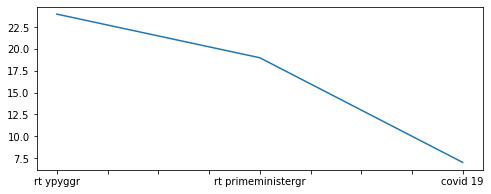

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(3).plot(figsize=(8,3))
sum_words.sort_values(ascending = False).head(3)

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,cov-2,covid,covid-19,covid19,covid19gr,covid_19
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)


covid19      16
covid_19      8
covid-19      7
covid19gr     3
covid         3
cov-2         1
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(1, 2), vocabulary = ['covid19', 'τεστ αντισωμάτων'])
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,covid19,τεστ αντισωμάτων
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])  #finds the tfidf score with normalization

In [ ]:

results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.columns
results.drop(['000', '05', '10', '16', '19', '200', '2020', '26', '2ο', '30','420','687','amp'], axis=1,inplace = True)
results

,73η,aegean,all,ambassador,amchamgr,amna_news,amna_newseng,and,arkouman,as,at,athensvoice,be,benjamin,briefing_covid19,by,citizens,coronavirus,covid,covid19,covid19gr,covid_19,covidー19,crisis,de,discusses,el,eody_gr,er_td4,ertsocial,est,eurobasket,for,general,government,greece,greek,grigoris_d,handling,have,...,συμπαράσταση,συμπολίτες,συνάντηση,συνέλευση,συνέντευξη,συνεργασία,συνεχίζει,συνεχίζουμε,συνεχίζουν,συνεχίσουμε,συνεχώς,συστρατευθήκαμε,σχέδιο,σχέση,σύμβολο,σύνοδο,σύνορα,σύστημα,τo,τεστ,τουρισμού,τουρισμό,υγεία,υγείας,υγειονομικές,υγειονομικής,υγειονομικούς,υγειονομικό,υγειονομικών,υγιεινή,υπάρχει,υπουργείου,υπουργού,φέτος,φροντίδα,χεριών,χρόνια,χώρα,χώρας,όπλα
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.298825,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.298825,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.199921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.25104,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49184,0.0,0.0,0.0,0.0,0.0,0.0,0.443567,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.221823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.275253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.330823,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity



In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.18261226 0.         ... 0.         0.         0.        ]
 [0.18261226 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.00880433 0.22617898 0.03592119]
 ...
 [0.         0.         0.00880433 ... 1.         0.02000496 0.        ]
 [0.         0.         0.22617898 ... 0.02000496 1.         0.        ]
 [0.         0.         0.03592119 ... 0.         0.         1.        ]]


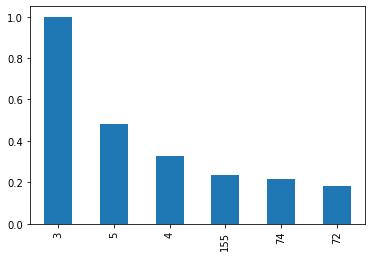

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(6).plot(kind = 'bar')


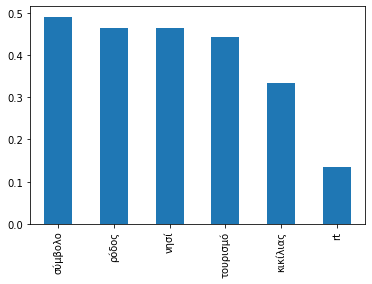

In [ ]:
pd.DataFrame(results).loc[3].sort_values(ascending = False).head(6).plot(kind = 'bar')


In [ ]:
import spacy
from spacy import displacy
import pandas as pd
from collections import defaultdict
import operator

In [ ]:
indexes = {}
df = pd.read_csv('https://raw.githubusercontent.com/cmourlas/DataAnalysisPython/master/lexicons/greek_sentiment_lexicon.tsv',sep='\t')
df = df.fillna('N/A')

In [ ]:
for index, row in df.iterrows():
    df.at[index, "Term"] = row["Term"].split(' ')[0]
    indexes[df.at[index, "Term"]] = index

In [ ]:
text= short_tweets['text'].str.cat(sep = ' ').replace("amp", ' ')

text

'Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ειδικευμένη γυναικολόγο-μαιευτήρα συνυπηρετώντας με τον ένστολο σύζυγό της.\n#Καστελόριζο Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις. Ενισχύουμε τις υγειονομικές δομές σε κάθε γωνιά της χώρας. \nΗ κενή θέση ιατρού υπηρεσίας υπαίθρου καλύπτεται από οπλίτη ιατρό, έπειτα από συνεννόηση με τον Υφυπουργό Εθνικής Άμυνας, Αλκιβιάδη Στεφανή. 🇬🇷   RT @USAmbPyatt: I’m very proud of the role that US science and technology are playing in helping to shape the Greek response to #COVID19. M… RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι ένα νησί-σύμβολο για τον τουρισμό μας   Θα τα καταφέρουμε. \nΚαι πάλι. #Ρόδος   Επισκέφθηκα σήμερα το Νοσοκομείο Ρόδου, που θα έχει από τη Δευτέρα μοριακό αναλυτή 420 τεστ/ημέρα.\nΕυχαριστώ τον Περιφερειάρχη @ghatzimarkos, που παρέδωσε στο ΕΚΑΒ δύο υπερσύγχρονες κάψουλες αεροδιακομιδών.\n\nΡόδος, νησί-σύμβολο για τον τουρισμό μας.\n#Δωδεκάνησα #Μένουμε_Ασφαλείς   RT @amna_newseng: Health Minister @Vkikilias visits #Rhode

In [ ]:
subj_scores = {
    'OBJ': 0,
    'SUBJ-': 0.5,
    'SUBJ+': 1,
}

emotion_scores = {
    'N/A': 0,
    '1.0': 0.2,
    '2.0': 0.4,
    '3.0': 0.6,
    '4.0': 0.8,
    '5.0': 1,
}

polarity_scores = {
    'N/A': 0,
    'BOTH': 0,
    'NEG': -1,
    'POS': 1
}

In [ ]:
nlp = spacy.load('el_core_news_md')
doc = nlp(text)

In [ ]:
subjectivity_score = 0
anger_score = 0
disgust_score = 0
fear_score =  0
happiness_score = 0
sadness_score = 0
surprise_score = 0
polarity_score = 0
matched_tokens = 0
for token in doc:
    lemmatized_token = token.lemma_
    if (lemmatized_token in indexes):
        indx = indexes[lemmatized_token]
        pos_flag = False
        for col in ["POS1", "POS2", "POS3", "POS4"]:
            if (token.pos_ == df.at[indx,col]):
                pos_flag = True
                break
        if (pos_flag == True):
            match_col_index = [int(s) for s in col if s.isdigit()][0]
            subjectivity_score += subj_scores[df.at[indx,'Subjectivity'+str(match_col_index)]]
            anger_score += emotion_scores[str(df.at[indx, 'Anger'+str(match_col_index)])]
            disgust_score += emotion_scores[str(df.at[indx, 'Disgust'+str(match_col_index)])]
            fear_score += emotion_scores[str(df.at[indx, 'Fear'+str(match_col_index)])]
            happiness_score += emotion_scores[str(df.at[indx, 'Happiness'+str(match_col_index)])]
            sadness_score += emotion_scores[str(df.at[indx,'Sadness'+str(match_col_index)])]
            surprise_score += emotion_scores[str(df.at[indx, 'Surprise'+str(match_col_index)])]
            polarity_score += polarity_scores[str(df.at[indx, 'Polarity'+str(match_col_index)])]
            matched_tokens+=1

In [ ]:
try:
    print('Subjectivity: ' + str(subjectivity_score/matched_tokens * 100)+'%')
    emotions = {'anger': anger_score, 'disgust': disgust_score, 'fear':fear_score, 'happiness':happiness_score, 'sadness': sadness_score, 'surprise': surprise_score}
    emotion = max(emotions.items(), key=operator.itemgetter(1))[0]
    if (emotions[emotion] == 0):
        print('Unable to detect emotion')
    else:
        print('Main emotion: ' + emotion + '. Emotion score: ' + str(emotions[emotion]*100/matched_tokens) + '%')
        print('Polarity: ', polarity_score)
except:
    print('No matched tokens')

Subjectivity: 33.587786259541986%
Main emotion: surprise. Emotion score: 31.450381679389313%
Polarity:  7


In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
doc = TextBlob(text)
doc.words


WordList(['Προσλαμβάνουμε', 'άμεσα', 'ως', 'επικουρικό', 'προσωπικό', 'ειδικευμένη', 'γυναικολόγο-μαιευτήρα', 'συνυπηρετώντας', 'με', 'τον', 'ένστολο', 'σύζυγό', 'της', 'Καστελόριζο', 'Σήμερα', 'στο', 'Καστελόριζο', 'για', 'να', 'δώσουμε', 'λύσεις', 'Ενισχύουμε', 'τις', 'υγειονομικές', 'δομές', 'σε', 'κάθε', 'γωνιά', 'της', 'χώρας', 'Η', 'κενή', 'θέση', 'ιατρού', 'υπηρεσίας', 'υπαίθρου', 'καλύπτεται', 'από', 'οπλίτη', 'ιατρό', 'έπειτα', 'από', 'συνεννόηση', 'με', 'τον', 'Υφυπουργό', 'Εθνικής', 'Άμυνας', 'Αλκιβιάδη', 'Στεφανή', '🇬🇷', 'RT', 'USAmbPyatt', 'I', '’', 'm', 'very', 'proud', 'of', 'the', 'role', 'that', 'US', 'science', 'and', 'technology', 'are', 'playing', 'in', 'helping', 'to', 'shape', 'the', 'Greek', 'response', 'to', 'COVID19', 'M…', 'RT', 'rodosreport', 'Β', 'Κικίλιας', 'Η', 'Ρόδος', 'είναι', 'ένα', 'νησί-σύμβολο', 'για', 'τον', 'τουρισμό', 'μας', 'Θα', 'τα', 'καταφέρουμε', 'Και', 'πάλι', 'Ρόδος', 'Επισκέφθηκα', 'σήμερα', 'το', 'Νοσοκομείο', 'Ρόδου', 'που', 'θα', 'έχει'

In [ ]:
print(doc.word_counts['covid19'])
print(doc.word_counts['coronavirus'])


16
2
0


In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
doc.noun_phrases 

WordList(['προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό', 'ειδικευμένη γυναικολόγο-μαιευτήρα συνυπηρετώντας με τον ένστολο σύζυγό της', '# καστελόριζο σήμερα στο # καστελόριζο για να δώσουμε λύσεις', 'ενισχύουμε τις υγειονομικές δομές σε κάθε γωνιά της χώρας', 'η κενή θέση ιατρού υπηρεσίας υπαίθρου καλύπτεται από οπλίτη ιατρό', 'έπειτα από συνεννόηση με τον υφυπουργό εθνικής άμυνας', 'αλκιβιάδη στεφανή', 'rt', 'usambpyatt', '’ m', 'us science', 'greek response', 'covid19', 'm… rt', '@ rodosreport', 'β. κικίλιας', 'η ρόδος είναι ένα νησί-σύμβολο για τον τουρισμό μας θα τα καταφέρουμε', 'και πάλι', '# ρόδος επισκέφθηκα σήμερα το νοσοκομείο ρόδου', 'που θα έχει από τη δευτέρα μοριακό αναλυτή', 'ευχαριστώ τον περιφερειάρχη @ ghatzimarkos', 'που παρέδωσε στο εκαβ δύο υπερσύγχρονες κάψουλες αεροδιακομιδών', 'νησί-σύμβολο για τον τουρισμό μας', '# δωδεκάνησα # μένουμε_ασφαλείς', 'rt', '@ amna_newseng', 'health minister @', 'vkikilias', 'rhodes', 'general hospital μοριακός αναλυτής με δυνατότη

In [ ]:
doc.ngrams(2)

[WordList(['Προσλαμβάνουμε', 'άμεσα']),
 WordList(['άμεσα', 'ως']),
 WordList(['ως', 'επικουρικό']),
 WordList(['επικουρικό', 'προσωπικό']),
 WordList(['προσωπικό', 'ειδικευμένη']),
 WordList(['ειδικευμένη', 'γυναικολόγο-μαιευτήρα']),
 WordList(['γυναικολόγο-μαιευτήρα', 'συνυπηρετώντας']),
 WordList(['συνυπηρετώντας', 'με']),
 WordList(['με', 'τον']),
 WordList(['τον', 'ένστολο']),
 WordList(['ένστολο', 'σύζυγό']),
 WordList(['σύζυγό', 'της']),
 WordList(['της', 'Καστελόριζο']),
 WordList(['Καστελόριζο', 'Σήμερα']),
 WordList(['Σήμερα', 'στο']),
 WordList(['στο', 'Καστελόριζο']),
 WordList(['Καστελόριζο', 'για']),
 WordList(['για', 'να']),
 WordList(['να', 'δώσουμε']),
 WordList(['δώσουμε', 'λύσεις']),
 WordList(['λύσεις', 'Ενισχύουμε']),
 WordList(['Ενισχύουμε', 'τις']),
 WordList(['τις', 'υγειονομικές']),
 WordList(['υγειονομικές', 'δομές']),
 WordList(['δομές', 'σε']),
 WordList(['σε', 'κάθε']),
 WordList(['κάθε', 'γωνιά']),
 WordList(['γωνιά', 'της']),
 WordList(['της', 'χώρας']),


In [ ]:
ngram = pd.DataFrame(doc.ngrams(2))
ngram.head()


,0,1
0,Προσλαμβάνουμε,άμεσα
1,άμεσα,ως
2,ως,επικουρικό
3,επικουρικό,προσωπικό
4,προσωπικό,ειδικευμένη


In [ ]:
doc.sentences

[Sentence("Προσλαμβάνουμε άμεσα ως επικουρικό προσωπικό, ειδικευμένη γυναικολόγο-μαιευτήρα συνυπηρετώντας με τον ένστολο σύζυγό της."),
 Sentence("#Καστελόριζο Σήμερα στο #Καστελόριζο για να δώσουμε λύσεις."),
 Sentence("Ενισχύουμε τις υγειονομικές δομές σε κάθε γωνιά της χώρας."),
 Sentence("Η κενή θέση ιατρού υπηρεσίας υπαίθρου καλύπτεται από οπλίτη ιατρό, έπειτα από συνεννόηση με τον Υφυπουργό Εθνικής Άμυνας, Αλκιβιάδη Στεφανή."),
 Sentence("🇬🇷   RT @USAmbPyatt: I’m very proud of the role that US science and technology are playing in helping to shape the Greek response to #COVID19."),
 Sentence("M… RT @rodosreport: Β. Κικίλιας: Η Ρόδος είναι ένα νησί-σύμβολο για τον τουρισμό μας   Θα τα καταφέρουμε."),
 Sentence("Και πάλι."),
 Sentence("#Ρόδος   Επισκέφθηκα σήμερα το Νοσοκομείο Ρόδου, που θα έχει από τη Δευτέρα μοριακό αναλυτή 420 τεστ/ημέρα."),
 Sentence("Ευχαριστώ τον Περιφερειάρχη @ghatzimarkos, που παρέδωσε στο ΕΚΑΒ δύο υπερσύγχρονες κάψουλες αεροδιακομιδών."),
 Sentence("Ρόδος,